In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

from sklearn import datasets

%matplotlib inline
pd.set_option("display.max_columns", None)

# Lab 22 - Determining the number of clusters

We will look at two methods for determining the number of clusters.  

## Inertia and the elbow method
The first method assmes you have centers for the clusters, as in k-means clustering. It computes the sum of the squared distances of samples to their closest cluster center.

We'll load the iris dataset, as in Lab 20.

In [2]:
iris_dict = datasets.load_iris()

iris = pd.DataFrame(iris_dict.data, columns = iris_dict.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Scale the data columns to be between 0 and 1.

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
iris_scaled = scaler.fit_transform(iris)
iris_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Use k-means with k = 3 to compute the clusters.  

In [7]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(iris_scaled)
kmeans_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

We can compute the sum of the squared distance of the samples to their closest cluster center as follows (`kmeans` should be the variable holding information about the k-means clustering algorithm).

In [8]:
kmeans.inertia_

6.982216473785234

To find the best k value, we make a loop to compute the inertia for each k, storing the result in a list.

In [9]:
inertia_list = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_clusters = kmeans.fit_predict(iris_scaled)
    inertia_list.append(kmeans.inertia_)

Plot the values in inertia_list.  You can use `range(1,11)` as the x values.

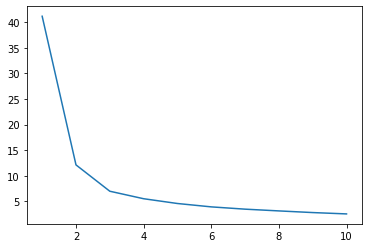

In [13]:
x = range(1, 11)
y = inertia_list
plt.plot(x,y)

The elbow method tells us to look for where the curve straightens into a line.  That point is the suggested number of clusters.

We'll try this approach to determine the cluster number for the labor market data.  Let's load in and clean the labor market data from the previous labs.

In [19]:
labor = pd.read_csv("labor_market.csv", index_col = "Major")
labor["Median Wage Early Career"] = labor["Median Wage Early Career"].str.replace(",","").astype(float)
labor["Median Wage Mid-Career"] = labor["Median Wage Mid-Career"].str.replace(",","").astype(float)

In [20]:
labor.head()

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
Major,,,,,
Agriculture,3.1,53.9,40000.0,60000.0,20.8
Animal and Plant Sciences,3.0,57.4,35000.0,60000.0,34.8
Environmental Studies,4.6,49.3,36000.0,65000.0,32.2
Architecture,4.3,26.6,45000.0,75000.0,37.4
Ethnic Studies,5.7,50.1,38000.0,57000.0,49.4


Create a new dataframe with the scaled data.

In [21]:
labor_scaled = scaler.fit_transform(labor)

In [22]:
labor_scaled

array([[0.30882353, 0.68770227, 0.26315789, 0.25675676, 0.17218543],
       [0.29411765, 0.74433657, 0.13157895, 0.25675676, 0.40397351],
       [0.52941176, 0.61326861, 0.15789474, 0.32432432, 0.36092715],
       [0.48529412, 0.24595469, 0.39473684, 0.45945946, 0.44701987],
       [0.69117647, 0.62621359, 0.21052632, 0.21621622, 0.64569536],
       [0.42647059, 0.67313916, 0.26315789, 0.39189189, 0.21357616],
       [0.39705882, 0.50323625, 0.21052632, 0.32432432, 0.24668874],
       [1.        , 0.70873786, 0.13157895, 0.25675676, 0.1307947 ],
       [0.39705882, 0.58737864, 0.26315789, 0.41891892, 0.1307947 ],
       [0.58823529, 0.43203883, 0.52631579, 0.45945946, 0.22516556],
       [0.54411765, 0.19579288, 0.84210526, 0.72972973, 0.36258278],
       [0.10294118, 0.17475728, 0.15789474, 0.05405405, 0.61258278],
       [0.10294118, 0.12621359, 0.05526316, 0.        , 0.4602649 ],
       [0.13235294, 0.07281553, 0.13157895, 0.02702703, 0.60596026],
       [0.19117647, 0.19579288, 0.

Run k-means clustering on the scaled data with k = 4.

In [23]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_clusters = kmeans.fit_predict(labor_scaled)
kmeans_clusters

array([2, 2, 2, 3, 1, 2, 2, 2, 2, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 2, 1, 2, 1, 1, 1, 3, 2, 1, 2, 1, 0, 1, 1, 3, 1, 1,
       2, 2, 0, 1, 3, 1, 1, 2, 2, 3, 2, 2, 2, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       3, 2, 3, 1, 1, 3, 2, 2])

Compute the inertia for 4 clusters.

In [24]:
kmeans.inertia_

7.569268216456566

What is the inertia if there is only 1 cluster?  What is the inertia if every data point is its own cluster?

__The inertia if there is only 1 cluster is the variance * n. The inertia if every data point is its own cluster is 0.__

Compute the inertia for all values of k between 1 and 10 using a loop.

In [35]:
inertia_list = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_clusters = kmeans.fit_predict(labor_scaled)
    inertia_list.append(kmeans.inertia_)

Now, plot the inertias as a line graph.

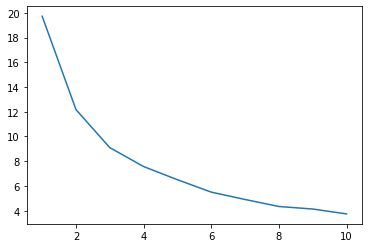

In [36]:
x = range(1, 11)
y = inertia_list
plt.plot(x,y)

Where do you think the elbow is for this graph?

__I believe the elbow is at k = 3 for this graph.__

## Silhouette Score

Instead of computing the inertia, which requires a cluster center, we can compute the silhouette score.  

First the Silhouette Coefficient is calculated for each data point.  If a is the mean distance from that point to all other points in its cluster and if b is the mean distance to all other points in the nearest cluster that the point is not part of, then the Silhouette Coefficient for a data point is 
$$\frac{b - a}{\max\{a,b\}}$$

The Silhouette Score is the mean silhouette coefficient for all data points.

Again compute the k-means clusters for the iris data set with k =3.

In [46]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(iris_scaled)
kmeans_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

We can compute the silhouette score as follows.

In [47]:
silhouette_score(iris_scaled,kmeans_clusters)

0.5047687565398589

We can find the value of k giving the lowest (best) silhouette score by using a loop to try different values of k, similarly to the elbow method.  Try doing this below.

In [49]:
silhouette_list = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_clusters = kmeans.fit_predict(iris_scaled)
    silhouette_list.append(silhouette_score(iris_scaled,kmeans_clusters))

In [57]:
sil_min = min(silhouette_list)

In [59]:
print("The value of k giving the lowest silhouette score is: " + str(silhouette_list.index(sil_min)))

The value of k giving the lowest silhouette score is: 7


Do you get a similar answer as with the elbow method?

__Not really__

Now try using the silhouette score to find the best value of k for the labor data.

In [62]:
silhouette_list = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_clusters = kmeans.fit_predict(labor_scaled)
    silhouette_list.append(silhouette_score(labor_scaled,kmeans_clusters))

In [63]:
sil_min = min(silhouette_list)
print("The value of k giving the lowest silhouette score is: " + str(silhouette_list.index(sil_min)))

The value of k giving the lowest silhouette score is: 7


0.27423776765350444

How does the k giving the best silhouette score compare to the elbow method?

__The k giving the best silhouette score is higher than the k obtained from the elbow method.__

## Starbucks drinks dataset

Try both the elbow method and the silhouette score to compute the optimum number of clusters for Starbucks drinks, based on their nutritional information.  The original dataset is from Kaggle [here]